# Working with FITS Files

---

## Learning Goals

- Open and explore astronomical data stored in FITS (Flexible Image Transport System) files.
- Load FITS files using `astropy.io.fits` and inspect the file structure and metadata.
- Visualize image data from FITS files using `matplotlib`.

## Table of Contents

- [Introduction](#Introduction)
- [Imports and Setup](#Imports-and-Setup)
- [Opening a Target Pixel File](#Opening-a-Target-Pixel-File)
  - [Looking Inside a TPF](#Looking-Inside-a-TPF)
  - [Inspecting the Headers](#Inspecting-the-Headers)
  - [Inspecting the Data Table](#Inspecting-the-Data-Table)
  - [Plotting a Single Cadence](#Plotting-a-Single-Cadence)
- [Opening a Light Curve File](#Opening-a-Light-Curve-File)
  - [Inspecting the Data Table](#Inspecting-the-Data-Table-1)
  - [Plotting the Light Curve](#Plotting-the-Light-Curve)
- [Exercise](#Exercise)

## Introduction

Dr. Nefarious, ever the thorn in astronomy’s side, has unleashed his latest scheme: he’s corrupted the headers of key TESS FITS files! Without those headers, the data is nearly unreadable, and astronomers everywhere are left staring at scrambled numbers instead of discovering new worlds.

Your mission, Agent, is to dive into these files and restore order. With the power of `astropy.io.fits`, you’ll learn to peel back the layers of TESS data products, decode the headers, and reveal the precious light curves and pixel data hidden within.

Every header keyword you unlock, every column you expose, brings you one step closer to foiling Dr. Nefarious’s plan and securing the archive.

## Imports and Setup

We will import the following packages:
- `astropy.io.fits` to open and read FITS files.
- `matplotlib.pyplot` to visualize the data.

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt

## Opening a Target Pixel File

TESS (the Transiting Exoplanet Survey Satellite) looks for planets by watching stars get slightly dimmer when a planet passes in front of them.

Instead of taking one huge picture of the whole sky, TESS also downloads small cutouts called Target Pixel Files (TPFs). Each TPF is like a little movie of a star, where each “frame” is called a cadence (about 2 minutes long). TPFs are used to analyze the brightness variations of stars over time, which can reveal phenomena such as transiting exoplanets, stellar variability, and other astrophysical events.

Before we dive in, let’s define a few important terms:

- Sector: TESS observes the sky in large strips. Each strip is called a sector (about a month of data).

- HDU (Header Data Unit): A FITS file is made up of “units” that contain either data (like an image) or metadata (information about the observation).

- BJD (Barycentric Julian Date): A standard time system used in astronomy.

- TBJD (TESS BJD): A simpler version of BJD, offset by 2457000.

- Cadence: The time between measurements (2 minutes for TPFs).

### Looking Inside a TPF

First, let's load in a TPF. Normally, we would search for this file through the MAST Archive, but to keep things simple, we'll just open it directly from the cloud. This TPF is for the star AU Mic. After loading the file to memory, we can use the `info` method to examine its structure.

In [2]:
target_pixel_file = 's3://stpubdata/tess/public/tid/s0027/0000/0004/4142/0236/tess2020186164531-s0027-0000000441420236-0189-s_tp.fits'

hdul_tpf = fits.open(target_pixel_file, fsspec_kwargs={'anon': True})
hdul_tpf.info()

Filename: <class 's3fs.core.S3File'>
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  PIXELS        1 BinTableHDU    248   17546R x 11C   [D, E, J, 143J, 143E, 143E, 143E, 143E, J, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 13)   int32   
  3  TARGET COSMIC RAY    1 BinTableHDU     27   0R x 4C   [J, I, I, E]   


You'll notice:

- `PRIMARY` (0): Primary header that contains metadata about the observation.
- `PIXELS` (1): Table of timestamps, fluxes, and other information.
- `APERTURE` (2): The aperture mask used to extract the light curve.
- `TARGET COSMIC RAY` (3): Currently unused.

### Inspecting the Headers

To inspect the metadata, we can look at the headers of each HDU. The primary header (HDU 0) contains general information about the observation, while HDU 1 has more specific details about the data. 

In the cell below, we display the header values for the primary header (HDU 0) by accessing the `header` attribute. Each line shows a keyword, its value, and a brief description comment.

In [3]:
hdul_tpf[0].header

SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    3 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
SIMDATA =                    F / file is based on simulated data                
ORIGIN  = 'NASA/Ames'          / institution responsible for creating this file 
DATE    = '2020-08-29'         / file creation date.                            
TSTART  =    2036.283336447470 / observation start time in BTJD                 
TSTOP   =    2060.647593255853 / observation stop time in BTJD                  
DATE-OBS= '2020-07-05T18:46:

### Inspecting the Data Table

The first extension (HDU 1) is a table with lots of useful columns. We can display these columns by accessing the `columns` attribute of the HDU.

In [4]:
hdul_tpf[1].columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'RAW_CNTS'; format = '143J'; unit = 'count'; null = -1; disp = 'I8'; dim = '(11,13)'
    name = 'FLUX'; format = '143E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,13)'
    name = 'FLUX_ERR'; format = '143E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,13)'
    name = 'FLUX_BKG'; format = '143E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,13)'
    name = 'FLUX_BKG_ERR'; format = '143E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,13)'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'POS_CORR1'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'POS_CORR2'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
)

Some especially important columns are:

- `TIME`: timestamps (in TBJD).

- `RAW_CNTS`: raw pixel values.

- `FLUX`: calibrated pixel values (corrected for the instrument).

- `FLUX_BKG`: background light level.

Now let’s pull out the time stamps and the calibrated flux values (our main signal).

In [5]:
tpf_data = hdul_tpf[1].data
tess_bjds = tpf_data["TIME"]
calibrated_fluxes = tpf_data["FLUX"]
hdul_tpf.close()

print("Type:", type(calibrated_fluxes))
print("Shape:", calibrated_fluxes.shape)

Type: <class 'numpy.ndarray'>
Shape: (17546, 13, 11)


The shape of this data tells us that there are 17,546 cadences (rows), and each cadence is a 13x11 image of pixels.

### Plotting a Single Cadence

Now, let's visualize the calibrated fluxes for a single cadence (the fifth one, index 4). This will give us an idea of what the star and its surroundings look like at that moment in time. The image will show us the star (bright pixels) and the surrounding sky (dimmer pixels).

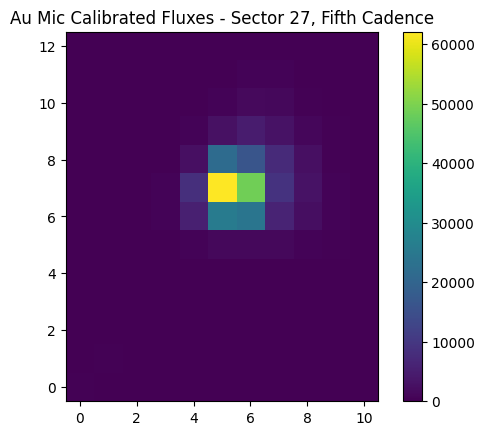

In [6]:
# Plot the calibrated fluxes for the fifth cadence (index 4)
plt.imshow(calibrated_fluxes[4,:,:], origin="lower")
plt.title("Au Mic Calibrated Fluxes - Sector 27, Fifth Cadence")
plt.colorbar()
plt.show()

## Opening a Light Curve File

Now that we've seen how to open and explore a TPF, let's look at a light curve file. A light curve file contains a timeseries of brightness measurements for a star, extracted from the TPF. We'll look at the light curve for the same star, AU Mic.

In [8]:
light_curve_file = 's3://stpubdata/tess/public/tid/s0027/0000/0004/4142/0236/tess2020186164531-s0027-0000000441420236-0189-s_lc.fits'

hdul_lc = fits.open(light_curve_file, fsspec_kwargs={'anon': True})
hdul_lc.info()

Filename: <class 's3fs.core.S3File'>
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    161   17546R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 13)   int32   


The output shows us three HDUs:

- `PRIMARY` (0): Primary header that contains metadata about the observation.
- `LIGHTCURVE` (1): Table of timestamps, fluxes, and other information.
- `APERTURE` (2): The aperture mask used to extract the light curve.

The information we want is in the `LIGHTCURVE` extension (HDU 1).

### Inspecting the Data Table

The first extension (HDU 1) is a table with lots of useful columns. We can display these columns by accessing the `columns` attribute of the HDU.

In [9]:
hdul_lc[1].columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'PSF_CENTR1'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR1_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'PSF_CENTR2'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR2_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'MOM_CENTR1'; format = 'D'; u

Here we see columns such as:

- `TIME`: Timestamps (in TBJD).
- `SAP_FLUX`: Simple Aperture Photometry flux (our main signal).
- `PDCSAP_FLUX`: The corrected flux with instrunmental trends removed.

For plotting, we'll focus on `TIME` and `PDCSAP_FLUX`.

In [10]:
lc_data = hdul_lc[1].data
time = lc_data["TIME"]
pdcsap_flux = lc_data["PDCSAP_FLUX"]
hdul_lc.close()

print("Shape of TIME array:", time.shape)
print("Shape of PDCSAP_FLUX array:", pdcsap_flux.shape)

Shape of TIME array: (17546,)
Shape of PDCSAP_FLUX array: (17546,)


The shape of both data arrays tells us that we have 17,546 timestamps and corresponding flux measurements.

### Plotting the Light Curve

Now, let's plot the light curve using `matplotlib`. We'll plot the corrected flux (`PDCSAP_FLUX`) against time (`TIME`). This will show us how the brightness of the star changes over time, which can reveal interesting phenomena like transiting exoplanets or stellar variability.

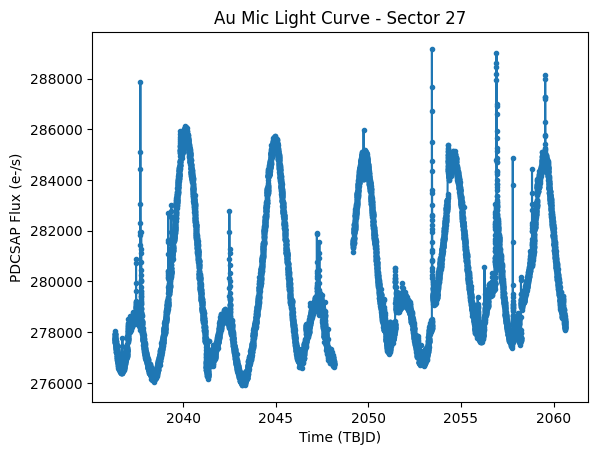

In [11]:
plt.plot(time, pdcsap_flux, '.-')
plt.xlabel('Time (TBJD)')
plt.ylabel('PDCSAP Flux (e-/s)')
plt.title('Au Mic Light Curve - Sector 27')
plt.show()

Using the `lightkurve` package would have made this process much simpler, but understanding how to work with FITS files directly is crucial for more advanced analyses and custom workflows.

## Exercise

To unlock your clue for this challenge, you'll need to explore a different light curve file using the workflow described in this notebook. The light curve we will examine is for TIC 25155310, a star which is known to host an exoplanet, WASP-126 b.

First, open the light curve from the cloud using the URI below.

In [13]:
# URI for the light curve of TIC 25155310
lc_uri = 's3://stpubdata/tess/public/tid/s0004/0000/0000/2515/5310/tess2018292075959-s0004-0000000025155310-0124-s_lc.fits'

# Open the light curve file from the cloud
hdul = fits.open(lc_uri, fsspec_kwargs={'anon': True})
hdul.info()

Filename: <class 's3fs.core.S3File'>
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   18684R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   


Next, you should access the header of the `PRIMARY` HDU extension. These header keywords contain important metadata about the observation. 

Print out the values for the following keywords: `SECTOR`, `CAMERA`, `CCD`, and `TICID`.

In [14]:
# Inspect the primary header and print out values for the keywords above
header = hdul[0].header
print("SECTOR:", header["SECTOR"])
print("CAMERA:", header["CAMERA"])
print("CCD:", header["CCD"])
print("TICID:", header["TICID"])

SECTOR: 4
CAMERA: 4
CCD: 2
TICID: 25155310


**Your first clue for this notebook is the letter that corresponds to the sum of the digits in the `TICID` value + 1.**

Next, inspect the header of the `LIGHTCURVE` HDU extension. This header contains information about the data table.

**Your next hint is the value for the keyword `TFORM2` in this header.**

In [15]:
# Inspect the header of the LIGHTCURVE extension
hdul[1].header

XTENSION= 'BINTABLE'           / marks the beginning of a new HDU               
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  100 / length of first array dimension                
NAXIS2  =                18684 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
TFIELDS =                   20 / number of table fields                         
TTYPE1  = 'TIME    '           / column title: data time stamps                 
TFORM1  = 'D       '           / column format: 64-bit floating point           
TUNIT1  = 'BJD - 2457000, days' / column units: Barycenter corrected TESS Julian
TDISP1  = 'D14.7   '           / column display format                          
TTYPE2  = 'TIMECORR'        

To find your final clue, let's make things a bit more challenging! First, plot this light curve using the `TIME` and `PDCSAP_FLUX` columns.

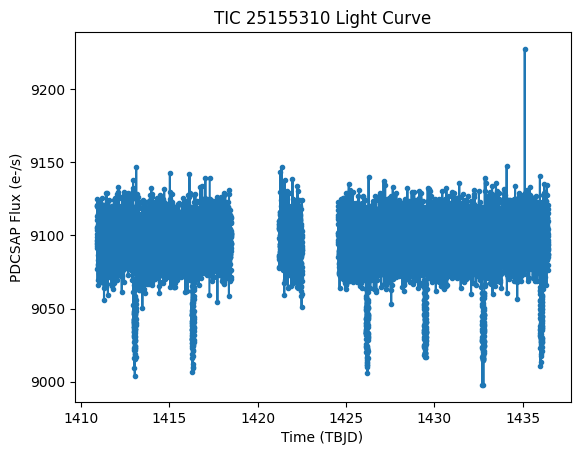

In [16]:
# Plot the light curve
# HINT: See the code under the "Plotting the Light Curve" heading above if you're stuck!
lc_data = hdul[1].data
time = lc_data["TIME"]
pdcsap_flux = lc_data["PDCSAP_FLUX"]

# Plot the light curve
plt.plot(time, pdcsap_flux, '.-')
plt.xlabel('Time (TBJD)')
plt.ylabel('PDCSAP Flux (e-/s)')
plt.title('TIC 25155310 Light Curve')
plt.show()

There are some clear transits in this data! Let's look more closely at one of them. We've given you the epoch (reference point in time) of a transit in TBJD (TESS Barycentric Julian Date) as `t0 = 1413.03`. Zoom in on the light curve to show the region from `t0 - 0.3` to `t0 + 0.3`.

HINT: You can use `plt.xlim()` to set the x-axis limits of your plot.

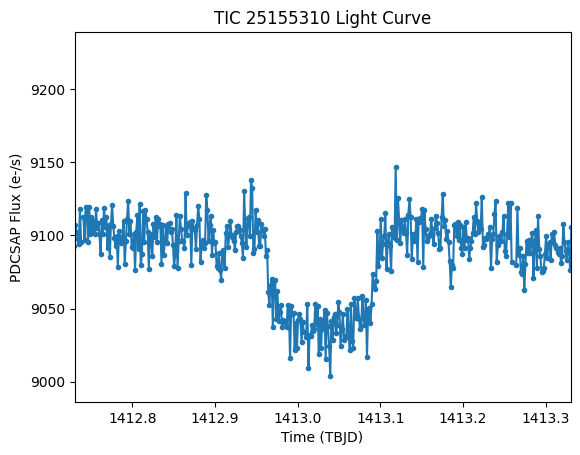

In [17]:
# Epoch of a transit in TBJD
t0 = 1413.03

# Plot the transit!
plt.plot(time, pdcsap_flux, '.-')
plt.xlim(t0 - 0.3, t0 + 0.3)
plt.xlabel('Time (TBJD)')
plt.ylabel('PDCSAP Flux (e-/s)')
plt.title('TIC 25155310 Light Curve')
plt.show()

Wow, look at that transit! Note the first tick value shown on the x-axis of your zoomed-in plot. **Your final clue is the letter that corresponds to the final digit of this tick value.**

Congratulations, Agent! Now that you've completed all the challenges and gathered your clues (you should have 7 letters in total), you are one step closer to thwarting Dr. Nefarious's plans and securing the astronomical archives. See the `Final_Challenge.ipynb` notebook to complete your mission!

## Additional Resources

- [Notebook: Read and Display a TESS Target Pixel File](https://spacetelescope.github.io/mast_notebooks/notebooks/TESS/beginner_how_to_use_tp/beginner_how_to_use_tp.html)
- [Notebook: Read and Plot a TESS Light Curve File](https://spacetelescope.github.io/mast_notebooks/notebooks/TESS/beginner_how_to_use_lc/beginner_how_to_use_lc.html)
- [`astropy.io.fits` Documentation](https://docs.astropy.org/en/latest/io/fits/index.html)
- [Astropy Tutorial on FITS Images](https://learn.astropy.org/tutorials/FITS-images.html)

## About this Notebook:
If you have comments or questions on this notebook, please open a [GitHub issue on tike_content](https://github.com/spacetelescope/tike_content/issues/new) contact us through the [Archive Help Desk e-mail](mailto:archive@stsci.edu).

**Author:** Sam Bianco

**Last Updated:** September 2025

---

[Top of Page](#top)

<img style=float:right; src="https://raw.githubusercontent.com/spacetelescope/notebooks/master/assets/stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="Space Telescope Logo" width="200px"/>